<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- Grid Search로 Decision Tree 알고리즘 모델을 튜닝합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [4]:
# 기술통계 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [5]:
# 제거 대상: id
del_cols = ['id']

# 변수 제거
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [17]:
data.REPORTED_SATISFACTION.value_counts()

very_unsat    7909
very_sat      5053
unsat         3991
avg           2022
sat           1025
Name: REPORTED_SATISFACTION, dtype: int64

**2) x, y 분리**

In [15]:
# Target 설정
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**3) 가변수화**

In [14]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dummy_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, columns=dummy_cols, drop_first=True)

# 확인
x.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')

**4) 학습용, 평가용 데이터 분리**

In [18]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.성능 예측

- k-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

In [22]:
# 불러오기
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [38]:
# 선언하기
model = DecisionTreeClassifier(random_state=1)

In [39]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [40]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.61035714 0.62214286 0.60107143 0.61607143 0.62857143]
0.6156428571428572


# 5.모델 튜닝


- Grid Search로 튜닝을 진행합니다.

**1) 모델 튜닝**

In [43]:
# 파라미터 선언
  # max_depth: range(1, 51)
params = {
    'max_depth' : range(1,51)
}

# Grid Search 선언
  # cv=5
  # scoring='accuracy'
model = GridSearchCV(DecisionTreeClassifier(),
                    params,
                    cv=5,
                    verbose=2
                    )

verbose=0: 출력 없음   
verbose=1: 진행 상황에 대한 간단한 정보 출력 (텍스트가 적음)      
verbose=2: 더 자세한 정보 출력 (텍스트가 많음)      
verbose=3 이상: 아주 자세한 정보 출력    

In [44]:
# 학습하기
model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 51)}, verbose=2)

**2) 결과 확인**

In [30]:
# mean_test_score 확인
arr = model.cv_results_['mean_test_score']
print(len(arr))
arr

50


array([0.61735714, 0.656     , 0.68907143, 0.69964286, 0.69614286,
       0.69792857, 0.69714286, 0.694     , 0.68664286, 0.67971429,
       0.67142857, 0.66707143, 0.65992857, 0.65457143, 0.64807143,
       0.64614286, 0.634     , 0.63307143, 0.62885714, 0.62885714,
       0.62328571, 0.62342857, 0.61814286, 0.61678571, 0.61892857,
       0.6185    , 0.61735714, 0.61807143, 0.61664286, 0.61792857,
       0.61592857, 0.61635714, 0.61471429, 0.61264286, 0.6155    ,
       0.62164286, 0.62085714, 0.61285714, 0.6185    , 0.6175    ,
       0.61757143, 0.61228571, 0.61421429, 0.61357143, 0.61564286,
       0.61692857, 0.61407143, 0.61614286, 0.61607143, 0.6145    ])

In [45]:
# 최적 파라미터
model.best_params_

{'max_depth': 4}

In [46]:
# 최고 성능
model.best_score_

0.6996428571428571

**3) 변수 중요도**

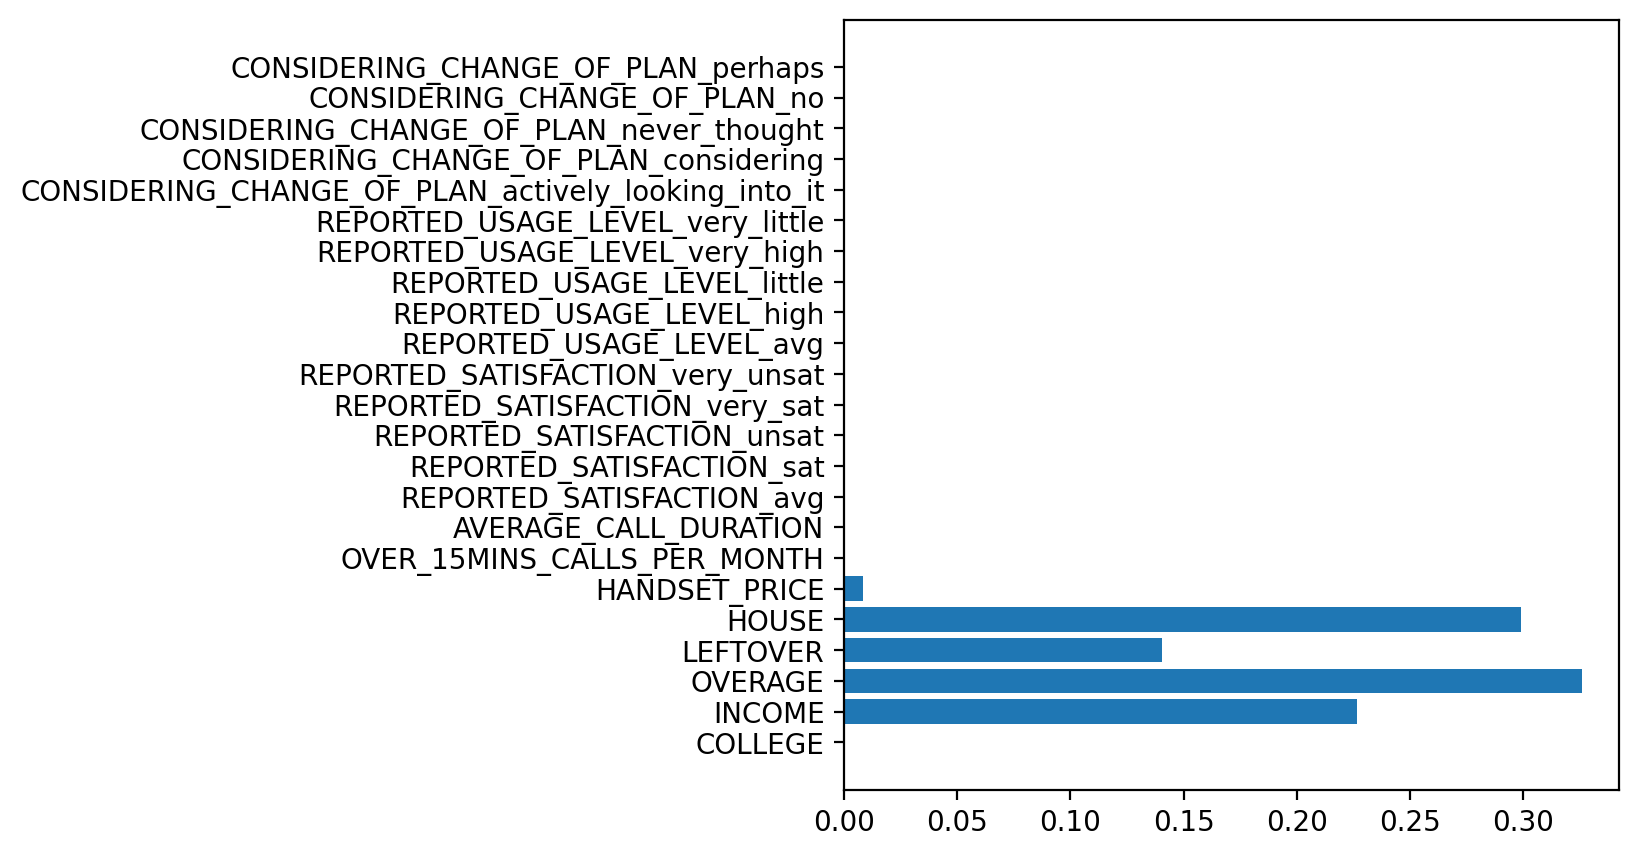

In [47]:
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_) # 최선의 DT : model.best_estimator_
plt.show()

# 6. 성능 평가

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수는 없겠지요?

In [48]:
# 예측하기
y_pred = model.predict(x_test)

In [49]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[1930 1135]
 [ 646 2289]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3065
           1       0.67      0.78      0.72      2935

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000



반올림 된 듯?

여기서, 

- 우리가 만나는 데이터는 불균형 데이터가 많음! : (under_sampling, over_sampling)

- test 데이터셋에 label이 없는 경우 : test 데이터셋 떼어놓는 것의 중요성을 보여주겠다!